In [146]:
# Pankhuri Singhal
# 11/1/22
# Full Data Analysis of Airfares.csv
# This notebook's Python code attempts to create and evaluate a machine learning model for a dataset
# of flights and their prices (data taken from a real dataset, 1996 USA). I'll include the full dataset in the repo.
# Cleans and preprocesses the dataset, creates the linear regression model, fits the data to it;
# and evaluates the predictive performance.

from matplotlib import pyplot as plt 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from math import sqrt

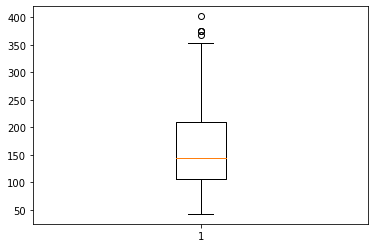

(638, 11)


In [147]:
#data cleaning
dfAir = pd.read_csv("Airfares.csv")
dfAir.head()
dfAir.columns

plt.boxplot(dfAir.iloc[:,-1]) #boxplot of FARE to see if there are outliers
plt.show()

dfAirSorted = dfAir.sort_values(by = "FARE", ascending = False) #sorting in order to drop rows
print(dfAirSorted.shape)
#dfAirSorted[0:10]

dfAirSorted.drop(dfAirSorted.index[0:5], inplace = True)


In [148]:
#normalizing

dfAirCleaned = dfAirSorted.copy(deep=True)
dfAirCleaned.head()
dfAirSorted.head() #for comparison after dropping columns
dfAirCleaned.columns

Index(['COUPON', 'NEW', 'SW', 'HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP',
       'DISTANCE', 'PAX', 'FARE'],
      dtype='object')

In [149]:
#categorical variables: NEW, SW
#remove before preprocessing
dfAirCleaned.drop(['NEW', 'SW'],  axis=1, inplace=True)
dfAirCleaned.columns
dfAirCleaned.head()

#normalizing across columns/features, not rows, 
#by overriding axis perimeter's default value
d = preprocessing.normalize(dfAirCleaned, axis=0)
colTitles = dfAirCleaned.columns
scaledDF = pd.DataFrame(d, columns=colTitles)
scaledDF.head()

,COUPON,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE
0,0.044361,0.047340,0.038684,0.039807,0.027545,0.046624,0.046503,0.008782,0.080114
1,0.045992,0.045823,0.042825,0.038694,0.042282,0.035523,0.055410,0.009326,0.079301
2,0.042078,0.053667,0.038684,0.046913,0.027545,0.081229,0.049231,0.034298,0.079201
3,0.042078,0.053667,0.038684,0.046913,0.027545,0.081229,0.049231,0.034298,0.079201
4,0.042078,0.053667,0.038684,0.046913,0.027545,0.081229,0.049231,0.034298,0.079201


In [150]:
#building a full model to predict fare with all other predictors 
#in cleaned, normalized dataset

selectIndex = ['COUPON', 'HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP',
       'DISTANCE', 'PAX']
air_X = scaledDF.loc[:, selectIndex] #all predictors in the cleaned, normalized dataset
air_y = scaledDF.loc[:, "FARE"]

#setting training partition to 30%, validation to 70%
#and seed of 22
X_trainAir, X_validAir, y_trainAir, y_validAir = \
    train_test_split(air_X, air_y, test_size=0.3, random_state=22)

#fitting the model
model = LinearRegression()
model.fit(X_trainAir, y_trainAir)

#getting coefficients and intercept for linear equation
np.set_printoptions(precision=4, suppress=True)
print("Coefficients: ", model.coef_)
print("Intercept:")
print("%.4f" % model.intercept_)

#now predict the fares
y_predAir = model.predict(X_validAir)

Coefficients:  [ 0.2467  0.3136  0.6796  0.3653  0.21    0.2397  0.4276 -0.1322]
Intercept:
-0.0514


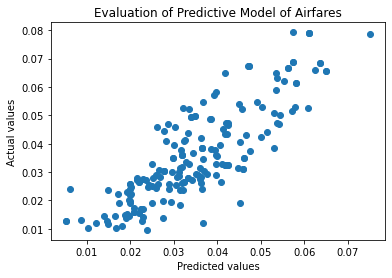

In [151]:
#evaluating performance of predictive model, with scatterplot
npPredictedValidSet = np.array(y_predAir)
npActualValidSet = y_validAir

plt.scatter(npPredictedValidSet, npActualValidSet)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Evaluation of Predictive Model of Airfares")
plt.show()

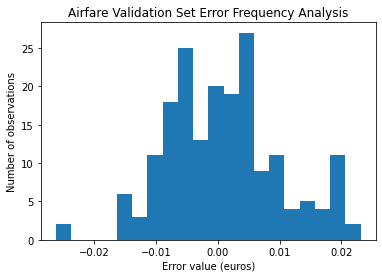

In [152]:
#error histogram for frequency of errors
numBins = 20
e = y_validAir - y_predAir
npError = np.array(e)

plt.hist(npError, numBins)
plt.xlabel("Error value (euros)")
plt.ylabel("Number of observations")
plt.title("Airfare Validation Set Error Frequency Analysis")
plt.show()

In [153]:
 #RMSE calculations
print("RMSE for full model:")
e = y_validAir - y_predAir
rmse = np.sqrt(np.mean(e**2))
print("%.4f" % rmse) 
print()

#normalized rmse calculation: rmse/(max - min)
npValidSet = np.array(y_validAir)
npValidSet
print("Max of Validation Set: ", npValidSet.max())
print("Min of Validation Set: ", npValidSet.min())
normRMSE = rmse / (npValidSet.max() - npValidSet.min())
print("Normalized RMSE: ", normRMSE) #relatively good, as it's closer to 0 than it is to 1. However,
                                        #removing the "NEW" and "SW" columns might have pushed the value up.

RMSE for full model:
0.0092

Max of Validation Set:  0.07930061393916278
Min of Validation Set:  0.009623387930383297
Normalized RMSE:  0.1325677694866482
